## 特征二值化

**基础知识**

In [2]:
import pandas as pd
path = "/Users/qiwsir/Documents/Codes/DataSet"
pm25 = pd.read_csv(path + "/pm25/pm2.csv")
pm25.head()

,RANK,CITY_ID,CITY_NAME,Exposed days
0,1,594,拉萨,2
1,2,579,玉溪,7
2,3,263,厦门,8
3,4,267,泉州,9
4,5,271,漳州,10


In [3]:
import numpy as np
pm25['bdays'] = np.where(pm25["Exposed days"] > pm25["Exposed days"].mean(), 1, 0)
pm25.sample(10)

,RANK,CITY_ID,CITY_NAME,Exposed days,bdays
253,276,351,菏泽,221,1
190,213,608,商洛,138,1
219,242,601,渭南,170,1
131,144,109,长春,98,0
60,68,512,百色,62,0
70,78,510,玉林,67,0
157,179,449,怀化,119,1
214,237,344,临沂,166,1
208,231,39,阳泉,155,1
87,97,293,赣州,78,0


In [4]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=pm25["Exposed days"].mean())    # ①
result = bn.fit_transform(pm25[["Exposed days"]])   # ②
pm25['sk-bdays'] = result
pm25.sample(10)

,RANK,CITY_ID,CITY_NAME,Exposed days,bdays,sk-bdays
4,5,271,漳州,10,0,0
146,164,178,苏州,109,1,1
224,247,406,孝感,176,1,1
152,173,391,黄石,114,1,1
104,116,91,锦州,88,0,0
37,42,581,昭通,47,0,0
33,38,615,张掖,46,0,0
154,176,500,柳州,115,1,1
41,46,462,珠海,49,0,0
22,25,470,湛江,32,0,0


In [5]:
pm25[["Exposed days"]].shape

(264, 1)

In [6]:
pm25["Exposed days"].shape

(264,)

In [7]:
pm25["Exposed days"].values.reshape((-1, 1)).shape

(264, 1)

In [8]:
from sklearn.preprocessing import binarize
fbin = binarize(pm25[['Exposed days']], threshold=pm25['Exposed days'].mean())
fbin[[1, 50, 100, 150, 200]]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [9]:
gau = np.random.normal(loc=0, scale=1.0, size=100)
gau

array([-0.03590507, -0.40482215,  0.98245272,  1.54696234, -0.37761397,
       -1.49834184, -1.99494521, -2.52998265,  0.57962338, -1.74875227,
        1.21576389,  0.79777863,  1.41156404,  1.52538421, -0.44935972,
       -0.07014083,  0.17756265,  1.8666962 , -0.00879422,  0.89758697,
        2.30146074, -0.7637075 , -0.86980786,  0.02838852,  0.16925536,
       -1.92109929, -1.70016414, -0.68321108, -1.53571694, -0.65532304,
        1.65930581,  1.41679742, -0.84823975, -1.12864276, -0.11644921,
       -0.8023729 , -0.28059203,  0.13368998, -0.44851665,  0.48179197,
        0.30074098, -0.11656805,  1.22438075, -1.28261241,  1.43683437,
       -1.28117482,  0.16123738,  1.06416699, -0.36518157, -0.65545199,
        0.74366589, -2.39531129,  0.02059873,  0.66522285, -2.3813902 ,
        1.11754609, -1.85602359, -0.67627994,  2.18927725,  1.14900484,
        0.16453496, -2.45971947,  1.33010469,  0.03347704,  1.01728682,
        0.62697048,  0.26589142, -0.36982008, -0.51515432, -1.06

In [10]:
gau_bin = Binarizer().fit_transform(gau.reshape(-1, 1))   
gau_bin.reshape(1,-1) [0]

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])

**项目案例**

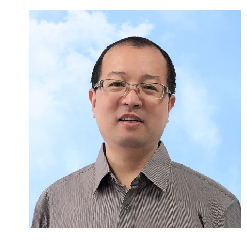

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
# 写一个专门在Jupyter中显示图片的函数
def show_img(img):    
    if len(img.shape) == 3:
        b, g, r = cv2.split(img)   
        img = cv2.merge([r, g, b])
        plt.imshow(img)
    else:
        plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

laoqi = cv2.imread("./images/laoqi.png")
show_img(laoqi)

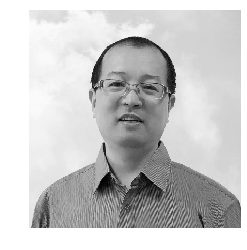

In [21]:
gray_laoqi = cv2.cvtColor(laoqi, cv2.COLOR_BGR2GRAY)
show_img(gray_laoqi)

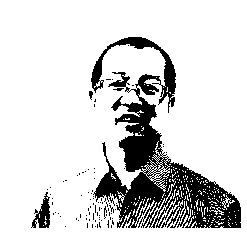

In [22]:
ret,thr = cv2.threshold(gray_laoqi, 127, 255, cv2.THRESH_BINARY)
show_img(thr)

**动手练习**

In [25]:
import datetime
def convert_time(s):
    h,m,s = map(int, s.split(":"))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

path = "/Users/qiwsir/Documents/Codes/DataSet"
marathon = pd.read_csv(path + "/marathon/marathon.csv",
                      converters={"split":convert_time, 
                                  "final":convert_time})
marathon.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [26]:
marathon['split'] = marathon['split'].astype(int) * 1e-9
marathon['final'] = marathon['final'].astype(int) * 1e-9
marathon.head()

,age,gender,split,final
0,33,M,3938.0,7731.0
1,32,M,3986.0,7768.0
2,31,M,4009.0,7842.0
3,38,M,3976.0,8025.0
4,31,M,3992.0,8039.0


In [27]:
marathon['frac'] = 1 - 2 * marathon['split'] / marathon["final"]
marathon.head()

,age,gender,split,final,frac
0,33,M,3938.0,7731.0,-0.018756
1,32,M,3986.0,7768.0,-0.026262
2,31,M,4009.0,7842.0,-0.022443
3,38,M,3976.0,8025.0,0.009097
4,31,M,3992.0,8039.0,0.006842


In [28]:
marathon['split_frac'] = np.where(marathon['frac']>0, 0, 1)
marathon.sample(10)

,age,gender,split,final,frac,split_frac
28197,35,M,7630.0,19747.0,0.227224,0
7397,25,M,5515.0,13887.0,0.205732,0
22318,45,M,7316.0,18076.0,0.190529,0
23414,41,M,7182.0,18374.0,0.218243,0
19376,41,M,7616.0,17271.0,0.118059,0
8474,46,M,6205.0,14269.0,0.130282,0
33173,51,M,9688.0,21981.0,0.118511,0
33374,37,M,9548.0,22111.0,0.136357,0
4592,53,M,6171.0,12815.0,0.036910,0
29116,25,W,8179.0,20058.0,0.184465,0
